In [1]:
# ============================================================================
# DOWNLOAD DATASET FROM GOOGLE DRIVE
# ============================================================================

# Install required package for Google Drive download
!pip install -q gdown
!pip install timm
!pip install torch torchvision pandas numpy matplotlib seaborn scikit-learn 


import gdown
import os
import zipfile

# Google Drive file ID (extracted from the sharing link)
file_id = "1UrEdiiUhYSfwOqdZUa82AeEixERQaHlp"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the dataset
output_file = "final_project_resources.zip"
print("📥 Downloading dataset from Google Drive...")
gdown.download(url, output_file, quiet=False)

# Extract the dataset
print("\n📦 Extracting dataset...")
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/")

print("✅ Dataset downloaded and extracted successfully!")
print(f"✅ Dataset location: /kaggle/working/final_project_resources/")

# Clean up zip file
os.remove(output_file)
print("✅ Cleanup complete")

📥 Downloading dataset from Google Drive...


Downloading...
From (original): https://drive.google.com/uc?id=1UrEdiiUhYSfwOqdZUa82AeEixERQaHlp
From (redirected): https://drive.google.com/uc?id=1UrEdiiUhYSfwOqdZUa82AeEixERQaHlp&confirm=t&uuid=d9866079-6685-4466-9d83-1edf827b1057
To: /kaggle/working/final_project_resources.zip
100%|██████████| 66.2M/66.2M [00:00<00:00, 271MB/s]



📦 Extracting dataset...
✅ Dataset downloaded and extracted successfully!
✅ Dataset location: /kaggle/working/final_project_resources/
✅ Cleanup complete


In [114]:
# ============================================================================
# DOWNLOAD FILE FROM GOOGLE DRIVE IN KAGGLE
# ============================================================================

import os

# Install gdown if not already installed
try:
    import gdown
except ImportError:
    print("Installing gdown...")
    !pip install -q gdown
    import gdown

# ============================================================================
# CONFIGURATION
# ============================================================================

# Google Drive file ID (extracted from your link)
FILE_ID = "1z-AGUKsfpabqDQBrTCIqgopmb-AnWLBy"

# Output file name (change this to whatever you want to name the file)
OUTPUT_FILE = "resnet18.pth"  # or .zip, .pt, .csv, etc.

# Download directory
DOWNLOAD_DIR = "/kaggle/working"

# ============================================================================
# DOWNLOAD FILE
# ============================================================================

print("="*70)
print("DOWNLOADING FILE FROM GOOGLE DRIVE")
print("="*70)

# Construct the download URL
url = f"https://drive.google.com/uc?id={FILE_ID}"

# Full output path
output_path = os.path.join(DOWNLOAD_DIR, OUTPUT_FILE)

print(f"\nDownloading to: {output_path}")
print("Please wait...\n")

# Download the file
gdown.download(url, output_path, quiet=False)

# Check if download was successful
if os.path.exists(output_path):
    file_size = os.path.getsize(output_path) / (1024 * 1024)  # Size in MB
    print(f"\n✅ Download complete!")
    print(f"   File: {output_path}")
    print(f"   Size: {file_size:.2f} MB")
else:
    print("\n❌ Download failed!")
    print("   The file might be private or the link is incorrect.")

# ============================================================================
# IF IT'S A ZIP FILE, EXTRACT IT (OPTIONAL)
# ============================================================================

# Uncomment the code below if you downloaded a .zip file

"""
if OUTPUT_FILE.endswith('.zip'):
    print(f"\n{'='*70}")
    print("EXTRACTING ZIP FILE")
    print(f"{'='*70}\n")
    
    import zipfile
    
    extract_dir = os.path.join(DOWNLOAD_DIR, "extracted")
    
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    
    print(f"✅ Extracted to: {extract_dir}")
    
    # List extracted files
    print("\nExtracted files:")
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            print(f"   {os.path.join(root, file)}")
    
    # Optional: Remove zip file after extraction
    # os.remove(output_path)
    # print(f"\n🗑️ Removed zip file: {output_path}")
"""

print("\n" + "="*70)
print("✅ DONE!")
print("="*70)

DOWNLOADING FILE FROM GOOGLE DRIVE

Please wait...



Downloading...
From (original): https://drive.google.com/uc?id=1z-AGUKsfpabqDQBrTCIqgopmb-AnWLBy
From (redirected): https://drive.google.com/uc?id=1z-AGUKsfpabqDQBrTCIqgopmb-AnWLBy&confirm=t&uuid=5adc9a50-5be0-4155-916c-e8858a314eec
To: /kaggle/working/resnet18.pth
100%|██████████| 45.0M/45.0M [00:00<00:00, 65.5MB/s]


✅ Download complete!
   File: /kaggle/working/resnet18.pth
   Size: 42.89 MB

✅ DONE!


In [2]:
# Install required packages (run once)
# Uncomment the lines below if packages are not installed

# !pip install timm opencv-python tqdm scikit-learn pandas matplotlib pillow
# !pip install torch torchvision  # If not already installed

print("✅ Check package imports in the next cell")

✅ Check package imports in the next cell


## 📦 Installation Requirements



In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import timm  # For Swin Transformer and Vision Transformer
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR
import cv2
from tqdm.auto import tqdm

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration - prioritize CUDA for Kaggle with multi-GPU support
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(42)
    num_gpus = torch.cuda.device_count()
    print(f"Using device: CUDA")
    print(f"Number of GPUs available: {num_gpus}")
    for i in range(num_gpus):
        print(f"  GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  GPU {i} Memory: {torch.cuda.get_device_properties(i).total_memory / 1e9:.2f} GB")
    if num_gpus > 1:
        print(f"\n🚀 Multi-GPU training enabled! Using {num_gpus} GPUs with DataParallel")
    use_multi_gpu = num_gpus > 1
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
    use_multi_gpu = False
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")
    use_multi_gpu = False
    
print(f"PyTorch version: {torch.__version__}")

# Define file paths for Kaggle
base_dir = "/kaggle/working/final_project_resources"
train_csv = os.path.join(base_dir, "train.csv")
val_csv = os.path.join(base_dir, "val.csv")

offsite_test_csv = os.path.join(base_dir, "offsite_test.csv")
print(f"Base directory: {base_dir}")

train_img_dir = os.path.join(base_dir, "images/train")
print("\n✅ File paths configured for Kaggle")

val_img_dir = os.path.join(base_dir, "images/val")

offsite_test_img_dir = os.path.join(base_dir, "images/offsite_test")
onsite_test_img_dir = os.path.join(base_dir, "images/onsite_test")

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Using device: CUDA
Number of GPUs available: 1
  GPU 0: Tesla P100-PCIE-16GB
  GPU 0 Memory: 17.06 GB
PyTorch version: 2.8.0+cu126
Base directory: /kaggle/working/final_project_resources

✅ File paths configured for Kaggle


In [4]:
# Analyze dataset statistics and class distribution
def analyze_dataset(csv_file, dataset_name="Dataset"):
    """Analyze class distribution in the dataset"""
    df = pd.read_csv(csv_file)
    
    print(f"\n{'='*70}")
    print(f"{dataset_name} Statistics")
    print(f"{'='*70}")
    print(f"Total images: {len(df)}")
    
    disease_names = ["D (DR)", "G (Glaucoma)", "A (AMD)"]
    class_cols = df.columns[1:4]  # Assuming columns are: id, D, G, A
    
    for i, (col, disease) in enumerate(zip(class_cols, disease_names)):
        positive = df[col].sum()
        negative = len(df) - positive
        pos_ratio = positive / len(df) * 100
        
        print(f"\n{disease}:")
        print(f"  Positive: {positive:4d} ({pos_ratio:5.2f}%)")
        print(f"  Negative: {negative:4d} ({100-pos_ratio:5.2f}%)")
        print(f"  Ratio (Pos:Neg): 1:{negative/max(positive, 1):.2f}")
    
    return df


def calculate_class_weights(csv_file):
    """
    Calculate class weights for handling imbalanced dataset
    Uses inverse frequency weighting
    """
    df = pd.read_csv(csv_file)
    class_cols = df.columns[1:4]  # D, G, A columns
    
    weights = []
    for col in class_cols:
        positive = df[col].sum()
        negative = len(df) - positive
        
        # Calculate positive weight (inverse frequency)
        # Higher weight for minority class
        pos_weight = negative / max(positive, 1)
        weights.append(pos_weight)
    
    weights_tensor = torch.tensor(weights, dtype=torch.float32)
    
    print(f"\n{'='*70}")
    print("CLASS WEIGHTS (for weighted BCE loss)")
    print(f"{'='*70}")
    disease_names = ["D (DR)", "G (Glaucoma)", "A (AMD)"]
    for disease, weight in zip(disease_names, weights):
        print(f"  {disease}: {weight:.4f}")
    print(f"{'='*70}\n")
    
    return weights_tensor


# Analyze all datasets
train_df = analyze_dataset(train_csv, "Training Set")
val_df = analyze_dataset(val_csv, "Validation Set")
offsite_test_df = analyze_dataset(offsite_test_csv, "Offsite Test Set")

# Calculate class weights from training data
class_weights = calculate_class_weights(train_csv)

print(f"\n{'='*70}")
print("AUGMENTATION STRATEGY")
print(f"{'='*70}")
print(f"Original training images: {len(train_df)}")
print(f"With augmentation (random transforms applied on-the-fly):")
print(f"  - Each epoch sees different augmented versions")
print(f"  - Effective dataset size: {len(train_df)} × augmentation variations")
print(f"  - Augmentation includes: rotation, flips, crops, color jitter,")
print(f"    affine transforms, shear, grayscale, elastic transforms")
print(f"{'='*70}")


Training Set Statistics
Total images: 800

D (DR):
  Positive:  517 (64.62%)
  Negative:  283 (35.38%)
  Ratio (Pos:Neg): 1:0.55

G (Glaucoma):
  Positive:  163 (20.38%)
  Negative:  637 (79.62%)
  Ratio (Pos:Neg): 1:3.91

A (AMD):
  Positive:  142 (17.75%)
  Negative:  658 (82.25%)
  Ratio (Pos:Neg): 1:4.63

Validation Set Statistics
Total images: 200

D (DR):
  Positive:  109 (54.50%)
  Negative:   91 (45.50%)
  Ratio (Pos:Neg): 1:0.83

G (Glaucoma):
  Positive:   58 (29.00%)
  Negative:  142 (71.00%)
  Ratio (Pos:Neg): 1:2.45

A (AMD):
  Positive:   44 (22.00%)
  Negative:  156 (78.00%)
  Ratio (Pos:Neg): 1:3.55

Offsite Test Set Statistics
Total images: 200

D (DR):
  Positive:  140 (70.00%)
  Negative:   60 (30.00%)
  Ratio (Pos:Neg): 1:0.43

G (Glaucoma):
  Positive:   49 (24.50%)
  Negative:  151 (75.50%)
  Ratio (Pos:Neg): 1:3.08

A (AMD):
  Positive:   22 (11.00%)
  Negative:  178 (89.00%)
  Ratio (Pos:Neg): 1:8.09

CLASS WEIGHTS (for weighted BCE loss)
  D (DR): 0.5474
  G (

In [47]:
# Install albumentations if not already installed
try:
    import albumentations as A
    from albumentations.pytorch import ToTensorV2
except ImportError:
    print("Installing albumentations...")
    import subprocess
    subprocess.check_call(["pip", "install", "-q", "albumentations"])
    import albumentations as A
    from albumentations.pytorch import ToTensorV2

class RetinaMultiLabelDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.image_dir, row.iloc[0])
        # Load as numpy array for Albumentations
        img = np.array(Image.open(img_path).convert("RGB"))
        labels = torch.tensor(row[1:].values.astype("float32"))
        
        if self.transform:
            transformed = self.transform(image=img)
            img = transformed['image']
        
        return img, labels, row.iloc[0]  # Also return filename for submission


# LIGHT AUGMENTATION with Albumentations (reduces overfitting)
train_transform_light = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.Affine(translate_percent=0.1, scale=(0.9, 1.1), rotate=5),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Inception V3 needs 299x299
train_transform_inception = A.Compose([
    A.Resize(299, 299),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Validation/Test transform (no augmentation)
val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

val_transform_inception = A.Compose([
    A.Resize(299, 299),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

print("✅ Albumentations transforms configured (LIGHT augmentation to reduce overfitting):")
print("  • train_transform_light: Minimal augmentation (224x224)")
print("    - HorizontalFlip, ShiftScaleRotate (slight), RandomBrightnessContrast (subtle)")
print("  • train_transform_inception: Same but 299x299 for Inception V3")
print("  • val_transform: No augmentation (224x224)")
print("  • val_transform_inception: No augmentation (299x299)")
print("  • ⚠️ Reduced augmentation strength to combat overfitting!")

✅ Albumentations transforms configured (LIGHT augmentation to reduce overfitting):
  • train_transform_light: Minimal augmentation (224x224)
    - HorizontalFlip, ShiftScaleRotate (slight), RandomBrightnessContrast (subtle)
  • train_transform_inception: Same but 299x299 for Inception V3
  • val_transform: No augmentation (224x224)
  • val_transform_inception: No augmentation (299x299)
  • ⚠️ Reduced augmentation strength to combat overfitting!


In [48]:
# ============================================================================
# GRADCAM IMPLEMENTATION FOR EXPLAINABLE AI
# ============================================================================

class GradCAM:
    """
    GradCAM: Gradient-weighted Class Activation Mapping
    Generates attention maps showing which features contribute most to model decisions
    """
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        # Register hooks
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate_cam(self, input_image, target_class=None):
        """Generate GradCAM heatmap for the input image"""
        # Forward pass
        model_output = self.model(input_image)
        
        if target_class is None:
            # For multi-label, we'll use the mean of all predictions
            target_class = torch.sigmoid(model_output).mean()
        else:
            target_class = model_output[:, target_class]
        
        # Backward pass
        self.model.zero_grad()
        target_class.backward(torch.ones_like(target_class), retain_graph=True)
        
        # Get gradients and activations
        gradients = self.gradients  # [batch, channels, h, w]
        activations = self.activations  # [batch, channels, h, w]
        
        # Global average pooling on gradients
        weights = gradients.mean(dim=(2, 3), keepdim=True)  # [batch, channels, 1, 1]
        
        # Weighted combination of activation maps
        cam = (weights * activations).sum(dim=1, keepdim=True)  # [batch, 1, h, w]
        
        # Apply ReLU to focus on positive contributions
        cam = F.relu(cam)
        
        # Normalize
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        
        return cam
    
    def visualize_cam(self, input_image, cam, original_image=None):
        """Overlay GradCAM heatmap on the original image"""
        # Resize CAM to match input image size
        cam_resized = F.interpolate(cam, size=input_image.shape[2:], mode='bilinear', align_corners=False)
        cam_resized = cam_resized.squeeze().cpu().numpy()
        
        # Convert to heatmap
        heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
        
        if original_image is not None:
            # Denormalize original image
            mean = np.array([0.485, 0.456, 0.406]).reshape(3, 1, 1)
            std = np.array([0.229, 0.224, 0.225]).reshape(3, 1, 1)
            img = input_image.squeeze().cpu().numpy()
            img = img * std + mean
            img = np.transpose(img, (1, 2, 0))
            img = np.clip(img, 0, 1)
            img = np.uint8(255 * img)
            
            # Overlay
            overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
            return overlay
        
        return heatmap


class GradCAMPlusPlus(GradCAM):
    """
    Improved version of GradCAM with better localization
    """
    def generate_cam(self, input_image, target_class=None):
        """Generate GradCAM++ heatmap"""
        # Forward pass
        model_output = self.model(input_image)
        
        if target_class is None:
            target_class = torch.sigmoid(model_output).mean()
        else:
            target_class = model_output[:, target_class]
        
        # Backward pass
        self.model.zero_grad()
        target_class.backward(torch.ones_like(target_class), retain_graph=True)
        
        gradients = self.gradients
        activations = self.activations
        
        # Calculate alpha weights (importance of each activation map)
        grad_2 = gradients.pow(2)
        grad_3 = grad_2 * gradients
        
        alpha = grad_2 / (2 * grad_2 + (grad_3 * activations).sum(dim=(2, 3), keepdim=True) + 1e-8)
        
        # Apply ReLU to positive gradients only
        weights = (alpha * F.relu(gradients)).sum(dim=(2, 3), keepdim=True)
        
        # Weighted combination
        cam = (weights * activations).sum(dim=1, keepdim=True)
        cam = F.relu(cam)
        
        # Normalize
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)
        
        return cam


def get_target_layer(model, backbone_name):
    """Get the appropriate layer for GradCAM based on backbone"""
    # Handle DataParallel wrapper
    if isinstance(model, nn.DataParallel):
        model = model.module
    
    if 'resnet' in backbone_name.lower():
        return model.backbone.layer4[-1]
    elif 'densenet' in backbone_name.lower():
        # For DenseNet, use the last dense block
        return model.backbone.features.denseblock4.denselayer16.conv2
    elif 'inception' in backbone_name.lower():
        # For Inception-V3, use the last mixed layer
        return model.backbone.Mixed_7c.branch_pool
    elif 'shufflenet' in backbone_name.lower():
        # For ShuffleNet V2, use the last convolutional layer
        return model.backbone.conv5
    elif 'vit' in backbone_name.lower():
        # For ViT, use the last attention block
        return model.backbone.blocks[-1].norm1
    else:
        # Default: try to find the last convolutional/norm layer
        for name, module in reversed(list(model.named_modules())):
            if isinstance(module, (nn.Conv2d, nn.LayerNorm, nn.BatchNorm2d)):
                return module
    
    raise ValueError(f"Could not find suitable target layer for {backbone_name}")


print("✅ GradCAM and GradCAM++ implementations added for explainable AI")

✅ GradCAM and GradCAM++ implementations added for explainable AI


In [78]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import timm
import numpy as np


# ============================================================================
# SE BLOCK (KEEP AS IS)
# ============================================================================

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


# ============================================================================
# MINIMAL CLASSIFIER - THIS IS KEY!
# ============================================================================

class OptimalMultiLabelClassifier(nn.Module):
    """
    ULTRA-SIMPLIFIED classifier for better performance
    Key: For only 3 classes, we don't need complex heads!
    """
    def __init__(self, backbone_name, num_classes=3, dropout=0.3, pretrained=True, use_se=True):
        super(OptimalMultiLabelClassifier, self).__init__()
        self.backbone_name = backbone_name
        self.use_se = use_se
        
        # ================================================================
        # BACKBONE
        # ================================================================
        if backbone_name == 'resnet50':
            self.backbone = models.resnet50(weights='IMAGENET1K_V2' if pretrained else None)
            num_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
            
            if use_se:
                original_layer4 = self.backbone.layer4
                self.backbone.layer4 = nn.Sequential(
                    original_layer4,
                    SEBlock(num_features, reduction=16)
                )
            
        elif backbone_name == 'densenet121':
            self.backbone = models.densenet121(weights='IMAGENET1K_V1' if pretrained else None)
            num_features = self.backbone.classifier.in_features
            self.backbone.classifier = nn.Identity()
            
            if use_se:
                self.se_block_post = SEBlock(num_features, reduction=16)
            
        elif backbone_name == 'inception_v3':
            self.backbone = models.inception_v3(weights='IMAGENET1K_V1' if pretrained else None, aux_logits=False)
            num_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
            
            if use_se:
                self.se_block_post = SEBlock(num_features, reduction=16)
            
        elif backbone_name == 'shufflenet_v2':
            self.backbone = models.shufflenet_v2_x1_0(weights='IMAGENET1K_V1' if pretrained else None)
            num_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
            
            if use_se:
                self.se_block_post = SEBlock(num_features, reduction=16)
            
        elif backbone_name == 'vit_base_patch16_224':
            self.backbone = timm.create_model('vit_base_patch16_224', pretrained=pretrained, num_classes=0)
            num_features = self.backbone.num_features
            
        else:
            raise ValueError(f"Unknown backbone: {backbone_name}")
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d(1)
        self.num_features = num_features
        
        # ================================================================
        # ULTRA-SIMPLE CLASSIFIER (Just dropout + linear!)
        # This is THE KEY to breaking 83%
        # ================================================================
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(num_features, num_classes)
        )
        
        # Initialize
        nn.init.xavier_uniform_(self.classifier[1].weight)
        nn.init.constant_(self.classifier[1].bias, 0)
    
    def forward(self, x):
        features = self.backbone(x)
        
        if len(features.shape) == 4:
            if self.use_se and hasattr(self, 'se_block_post'):
                features = self.se_block_post(features)
            features = self.adaptive_pool(features).flatten(1)
        elif len(features.shape) == 3:
            features = features.mean(dim=1)
        
        return self.classifier(features)
    
    def unfreeze_layers(self, num_layers=None):
        if num_layers is None:
            for param in self.backbone.parameters():
                param.requires_grad = True
        else:
            all_params = list(self.backbone.parameters())
            for param in all_params[-num_layers:]:
                param.requires_grad = True
    
    def freeze_backbone(self):
        for param in self.backbone.parameters():
            param.requires_grad = False
    
    def get_num_trainable_params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)


# ============================================================================
# FOCAL LOSS + LABEL SMOOTHING (Critical improvements!)
# ============================================================================

class FocalLossWithLabelSmoothing(nn.Module):
    """
    Combines Focal Loss (for hard examples) + Label Smoothing (for generalization)
    This will push you past 83%!
    """
    def __init__(self, alpha=0.25, gamma=2.0, smoothing=0.1, pos_weight=None):
        super(FocalLossWithLabelSmoothing, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.smoothing = smoothing
        self.pos_weight = pos_weight
    
    def forward(self, pred, target):
        # Apply label smoothing
        target = target * (1 - self.smoothing) + 0.5 * self.smoothing
        
        # Calculate BCE
        bce_loss = F.binary_cross_entropy_with_logits(
            pred, target, pos_weight=self.pos_weight, reduction='none'
        )
        
        # Calculate focal weight
        pred_prob = torch.sigmoid(pred)
        p_t = target * pred_prob + (1 - target) * (1 - pred_prob)
        focal_weight = (1 - p_t) ** self.gamma
        
        # Apply focal weight and alpha
        loss = self.alpha * focal_weight * bce_loss
        
        return loss.mean()


# ============================================================================
# MIXUP (Keep as is but ensure it's used!)
# ============================================================================

class MixUpLoss(nn.Module):
    def __init__(self, base_criterion):
        super(MixUpLoss, self).__init__()
        self.base_criterion = base_criterion
    
    def forward(self, pred, target_a, target_b, lam):
        return lam * self.base_criterion(pred, target_a) + \
               (1 - lam) * self.base_criterion(pred, target_b)


def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    
    return mixed_x, y_a, y_b, lam


# ============================================================================
# COSINE ANNEALING WARMUP (Better than ReduceLROnPlateau!)
# ============================================================================

class CosineAnnealingWarmupRestarts:
    """
    Cosine annealing with warmup - better learning rate schedule
    """
    def __init__(self, optimizer, first_cycle_steps, warmup_steps, max_lr, min_lr, gamma=0.9):
        self.optimizer = optimizer
        self.first_cycle_steps = first_cycle_steps
        self.warmup_steps = warmup_steps
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.gamma = gamma
        self.step_count = 0
        self.cycle = 0
        self.current_lr = max_lr
    
    def step(self):
        self.step_count += 1
        
        if self.step_count < self.warmup_steps:
            # Warmup
            lr = self.max_lr * (self.step_count / self.warmup_steps)
        else:
            # Cosine annealing
            progress = (self.step_count - self.warmup_steps) / (self.first_cycle_steps - self.warmup_steps)
            lr = self.min_lr + (self.max_lr - self.min_lr) * 0.5 * (1 + np.cos(np.pi * progress))
        
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
        
        self.current_lr = lr
        
        # Reset for next cycle
        if self.step_count >= self.first_cycle_steps:
            self.step_count = 0
            self.max_lr *= self.gamma

In [79]:
# ============================================================================
# COMPLETE OPTIMIZED TRAINING & EVALUATION UTILITIES
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


# ============================================================================
# ADVANCED LOSS FUNCTIONS
# ============================================================================

class FocalLossWithLabelSmoothing(nn.Module):
    """
    Focal Loss + Label Smoothing for better generalization
    Focuses on hard examples while preventing overconfidence
    """
    def __init__(self, alpha=0.25, gamma=2.0, smoothing=0.1, pos_weight=None):
        super(FocalLossWithLabelSmoothing, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.smoothing = smoothing
        self.pos_weight = pos_weight
    
    def forward(self, pred, target):
        # Apply label smoothing: 1 → 0.9, 0 → 0.1 (with smoothing=0.1)
        target_smooth = target * (1 - self.smoothing) + 0.5 * self.smoothing
        
        # BCE loss
        bce_loss = nn.functional.binary_cross_entropy_with_logits(
            pred, target_smooth, pos_weight=self.pos_weight, reduction='none'
        )
        
        # Focal weight: (1 - p_t)^gamma
        pred_prob = torch.sigmoid(pred)
        p_t = target_smooth * pred_prob + (1 - target_smooth) * (1 - pred_prob)
        focal_weight = (1 - p_t) ** self.gamma
        
        # Apply focal weight and alpha
        loss = self.alpha * focal_weight * bce_loss
        
        return loss.mean()


class MixUpLoss(nn.Module):
    """MixUp loss wrapper for any base criterion"""
    def __init__(self, base_criterion):
        super(MixUpLoss, self).__init__()
        self.base_criterion = base_criterion
    
    def forward(self, pred, target_a, target_b, lam):
        return lam * self.base_criterion(pred, target_a) + \
               (1 - lam) * self.base_criterion(pred, target_b)


def mixup_data(x, y, alpha=0.2):
    """
    Apply MixUp augmentation
    Args:
        x: Input images [B, C, H, W]
        y: Labels [B, num_classes]
        alpha: Beta distribution parameter (higher = more mixing)
    Returns:
        mixed_x, y_a, y_b, lam
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    
    return mixed_x, y_a, y_b, lam


# ============================================================================
# METRICS CALCULATION
# ============================================================================

def calculate_metrics(labels, predictions, threshold=0.5):
    """Calculate comprehensive metrics including F1 macro"""
    predictions_binary = (predictions > threshold).astype(int)
    
    # Per-class metrics
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for i in range(labels.shape[1]):
        acc = accuracy_score(labels[:, i], predictions_binary[:, i])
        prec = precision_score(labels[:, i], predictions_binary[:, i], zero_division=0)
        rec = recall_score(labels[:, i], predictions_binary[:, i], zero_division=0)
        f1 = f1_score(labels[:, i], predictions_binary[:, i], zero_division=0)
        
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)
    
    # Overall metrics
    overall_accuracy = accuracy_score(labels.ravel(), predictions_binary.ravel())
    f1_macro = f1_score(labels, predictions_binary, average='macro', zero_division=0)
    f1_micro = f1_score(labels, predictions_binary, average='micro', zero_division=0)
    
    # Cohen's Kappa for each class
    kappas = [cohen_kappa_score(labels[:, i], predictions_binary[:, i]) for i in range(labels.shape[1])]
    
    return {
        'per_class_accuracy': accuracies,
        'per_class_precision': precisions,
        'per_class_recall': recalls,
        'per_class_f1': f1_scores,
        'per_class_kappa': kappas,
        'overall_accuracy': overall_accuracy,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'mean_accuracy': np.mean(accuracies),
        'mean_precision': np.mean(precisions),
        'mean_recall': np.mean(recalls),
        'mean_f1': np.mean(f1_scores),
        'mean_kappa': np.mean(kappas)
    }


# ============================================================================
# TRAINING FUNCTIONS
# ============================================================================

def train_epoch(model, train_loader, criterion, mixup_criterion, optimizer, device, 
                use_mixup=True, mixup_alpha=0.2, mixup_prob=0.5, grad_clip=1.0):
    """
    Train for one epoch with MixUp and gradient clipping
    """
    model.train()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    
    pbar = tqdm(train_loader, desc='Training', leave=False)
    for images, labels, _ in pbar:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Apply MixUp with specified probability
        if use_mixup and np.random.rand() > (1 - mixup_prob):
            mixed_images, labels_a, labels_b, lam = mixup_data(images, labels, alpha=mixup_alpha)
            outputs = model(mixed_images)
            loss = mixup_criterion(outputs, labels_a, labels_b, lam)
            
            # For metrics, use original labels
            predictions = torch.sigmoid(outputs).detach().cpu().numpy()
            all_labels.append(labels.cpu().numpy())
            all_predictions.append(predictions)
        else:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            predictions = torch.sigmoid(outputs).detach().cpu().numpy()
            all_labels.append(labels.cpu().numpy())
            all_predictions.append(predictions)
        
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        if grad_clip > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=grad_clip)
        
        optimizer.step()
        
        running_loss += loss.item()
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    all_labels = np.vstack(all_labels)
    all_predictions = np.vstack(all_predictions)
    metrics = calculate_metrics(all_labels, all_predictions)
    
    return running_loss / len(train_loader), metrics


def validate(model, val_loader, criterion, device):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation', leave=False)
        for images, labels, _ in pbar:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            
            predictions = torch.sigmoid(outputs).cpu().numpy()
            all_labels.append(labels.cpu().numpy())
            all_predictions.append(predictions)
            
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    all_labels = np.vstack(all_labels)
    all_predictions = np.vstack(all_predictions)
    metrics = calculate_metrics(all_labels, all_predictions)
    
    return running_loss / len(val_loader), metrics


# ============================================================================
# EARLY STOPPING
# ============================================================================

class EarlyStopping:
    """Early stopping with min_delta threshold"""
    def __init__(self, patience=10, min_delta=0.0001, mode='max'):
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        
    def __call__(self, val_metric):
        if self.best_score is None:
            self.best_score = val_metric
            return False
        
        if self.mode == 'max':
            if val_metric > self.best_score + self.min_delta:
                self.best_score = val_metric
                self.counter = 0
            else:
                self.counter += 1
        else:
            if val_metric < self.best_score - self.min_delta:
                self.best_score = val_metric
                self.counter = 0
            else:
                self.counter += 1
        
        if self.counter >= self.patience:
            self.early_stop = True
        
        return self.early_stop


# ============================================================================
# COMPLETE TRAINING PIPELINE
# ============================================================================

def train_model(
    model, 
    train_loader, 
    val_loader, 
    class_weights,
    config,
    device='cuda',
    save_path=None
):
    """
    OPTIMIZED training pipeline with all improvements:
    - Focal Loss + Label Smoothing
    - MixUp augmentation
    - Gradient clipping
    - Cosine annealing or ReduceLROnPlateau
    - Early stopping
    - Two-stage fine-tuning
    """
    
    # Extract config
    num_epochs = config.get('epochs', 1)
    lr = config.get('lr', 1e-4)
    weight_decay = config.get('weight_decay', 1e-3)
    patience = config.get('patience', 15)
    finetune_epoch = config.get('finetune_epoch', 25)
    use_mixup = config.get('use_mixup', True)
    mixup_alpha = config.get('mixup_alpha', 0.2)
    mixup_prob = config.get('mixup_prob', 0.5)
    grad_clip = config.get('grad_clip', 1.0)
    use_focal_loss = config.get('use_focal_loss', True)
    label_smoothing = config.get('label_smoothing', 0.1)
    scheduler_type = config.get('scheduler', 'cosine')  # 'cosine' or 'plateau'
    
    # Setup loss functions
    if use_focal_loss:
        criterion = FocalLossWithLabelSmoothing(
            alpha=config.get('focal_alpha', 0.25),
            gamma=config.get('focal_gamma', 2.0),
            smoothing=label_smoothing,
            pos_weight=class_weights.to(device)
        )
        print("✅ Using Focal Loss + Label Smoothing")
    else:
        criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights.to(device))
        print("✅ Using BCE Loss")
    
    mixup_criterion = MixUpLoss(criterion) if use_mixup else None
    
    # Setup optimizer
    optimizer = optim.AdamW(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=lr,
        weight_decay=weight_decay,
        betas=(0.9, 0.999)
    )
    
    # Setup scheduler
    if scheduler_type == 'cosine':
        scheduler = CosineAnnealingLR(
            optimizer,
            T_max=num_epochs,
            eta_min=1e-7
        )
        print("✅ Using Cosine Annealing LR")
    else:
        scheduler = ReduceLROnPlateau(
            optimizer,
            mode='max',
            factor=0.5,
            patience=5,
            min_lr=1e-7
        )
        print("✅ Using ReduceLROnPlateau")
    
    # Early stopping
    early_stopping = EarlyStopping(patience=patience, min_delta=0.0001, mode='max')
    
    # Tracking
    history = {
        'train_loss': [], 'val_loss': [],
        'train_f1_macro': [], 'val_f1_macro': [],
        'train_acc': [], 'val_acc': [],
        'lr': []
    }
    
    best_f1_macro = 0.0
    best_model_state = None
    finetuning_started = False
    
    # Print configuration
    print(f"\n{'='*70}")
    print(f"OPTIMIZED TRAINING CONFIGURATION")
    print(f"{'='*70}")
    print(f"Model: {config.get('name', 'Unknown')}")
    print(f"Epochs: {num_epochs}")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {weight_decay} (STRONG!)")
    print(f"Fine-tuning starts: Epoch {finetune_epoch}")
    print(f"Early Stopping Patience: {patience}")
    print(f"MixUp: {'Enabled' if use_mixup else 'Disabled'} (alpha={mixup_alpha}, prob={mixup_prob})")
    print(f"Gradient Clipping: {grad_clip}")
    print(f"Label Smoothing: {label_smoothing}")
    print(f"Focal Loss: {'Enabled' if use_focal_loss else 'Disabled'}")
    print(f"Scheduler: {scheduler_type}")
    print(f"Class Weights: {class_weights.cpu().numpy()}")
    print(f"{'='*70}\n")
    
    # Training loop
    for epoch in range(num_epochs):
        # Start fine-tuning at specified epoch
        if epoch == finetune_epoch and not finetuning_started:
            print(f"\n{'🔥'*35}")
            print(f"🚀 STARTING FINE-TUNING: Unfreezing backbone")
            print(f"{'🔥'*35}\n")
            
            # Unfreeze backbone
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            model_to_unfreeze.unfreeze_layers()
            
            # Recreate optimizer with gentler LR reduction (divide by 3, not 10!)
            lr_finetune = lr / 3
            optimizer = optim.AdamW(
                model.parameters(),
                lr=lr_finetune,
                weight_decay=weight_decay,
                betas=(0.9, 0.999)
            )
            
            # Reset scheduler
            if scheduler_type == 'cosine':
                scheduler = CosineAnnealingLR(
                    optimizer,
                    T_max=num_epochs - finetune_epoch,
                    eta_min=1e-7
                )
            else:
                scheduler = ReduceLROnPlateau(
                    optimizer,
                    mode='max',
                    factor=0.5,
                    patience=5,
                    min_lr=1e-7
                )
            
            finetuning_started = True
        
        # Epoch header
        phase = '[FINE-TUNING]' if finetuning_started else '[TRANSFER LEARNING]'
        print(f"\nEpoch {epoch+1}/{num_epochs} {phase}")
        print("-" * 70)
        
        # Train
        train_loss, train_metrics = train_epoch(
            model, train_loader, criterion, mixup_criterion, optimizer, device,
            use_mixup=use_mixup,
            mixup_alpha=mixup_alpha,
            mixup_prob=mixup_prob,
            grad_clip=grad_clip
        )
        
        # Validate
        val_loss, val_metrics = validate(model, val_loader, criterion, device)
        
        # Update learning rate
        current_lr = optimizer.param_groups[0]['lr']
        if scheduler_type == 'cosine':
            scheduler.step()
        else:
            scheduler.step(val_metrics['f1_macro'])
        
        # Store history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1_macro'].append(train_metrics['f1_macro'])
        history['val_f1_macro'].append(val_metrics['f1_macro'])
        history['train_acc'].append(train_metrics['mean_accuracy'])
        history['val_acc'].append(val_metrics['mean_accuracy'])
        history['lr'].append(current_lr)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        print(f"Train F1: {train_metrics['f1_macro']:.4f} | Val F1: {val_metrics['f1_macro']:.4f}")
        print(f"Train Acc: {train_metrics['mean_accuracy']:.4f} | Val Acc: {val_metrics['mean_accuracy']:.4f}")
        print(f"Learning Rate: {current_lr:.6f}")
        print(f"Train-Val F1 Gap: {abs(train_metrics['f1_macro'] - val_metrics['f1_macro']):.4f}")
        
        # Save best model
        if val_metrics['f1_macro'] > best_f1_macro:
            best_f1_macro = val_metrics['f1_macro']
            best_model_state = model.state_dict().copy()
            print(f"✅ New best Val F1: {best_f1_macro:.4f}")
            
            if save_path:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': best_model_state,
                    'optimizer_state_dict': optimizer.state_dict(),
                    'best_f1_macro': best_f1_macro,
                    'val_metrics': val_metrics,
                    'config': config
                }, save_path)
                print(f"✅ Model saved to {save_path}")
        
        # Early stopping
        if early_stopping(val_metrics['f1_macro']):
            print(f"\n⚠️ Early stopping at epoch {epoch+1}")
            print(f"Best Val F1: {best_f1_macro:.4f}")
            break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"\n✅ Loaded best model (Val F1: {best_f1_macro:.4f})")
    
    return model, history


# ============================================================================
# SUMMARY
# ============================================================================

print("=" * 70)
print("✅ OPTIMIZED TRAINING UTILITIES LOADED")
print("=" * 70)
print("\n🚀 KEY FEATURES:")
print("  • Focal Loss + Label Smoothing (better generalization)")
print("  • MixUp augmentation (configurable probability)")
print("  • Gradient clipping (prevents instability)")
print("  • Cosine Annealing or ReduceLROnPlateau")
print("  • Two-stage fine-tuning (gentle LR reduction)")
print("  • Tighter early stopping")
print("  • Comprehensive metrics tracking")

print("\n💡 USAGE:")
print("""
# Train with optimal settings
model, history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    class_weights=class_weights,
    config=OPTIMAL_CONFIGS['vit_base_optimal'],
    device='cuda',
    save_path='best_model.pth'
)
""")
print("=" * 70)

✅ OPTIMIZED TRAINING UTILITIES LOADED

🚀 KEY FEATURES:
  • Focal Loss + Label Smoothing (better generalization)
  • MixUp augmentation (configurable probability)
  • Gradient clipping (prevents instability)
  • Cosine Annealing or ReduceLROnPlateau
  • Two-stage fine-tuning (gentle LR reduction)
  • Tighter early stopping
  • Comprehensive metrics tracking

💡 USAGE:

# Train with optimal settings
model, history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    class_weights=class_weights,
    config=OPTIMAL_CONFIGS['vit_base_optimal'],
    device='cuda',
    save_path='best_model.pth'
)



In [80]:
# ============================================================================
# PREDICTION & SUBMISSION GENERATION
# ============================================================================

def generate_predictions(model, test_loader, device):
    """Generate predictions for test set"""
    model.eval()
    all_predictions = []
    all_filenames = []
    
    with torch.no_grad():
        pbar = tqdm(test_loader, desc='Generating predictions')
        for images, labels, filenames in pbar:
            images = images.to(device)
            outputs = model(images)
            predictions = torch.sigmoid(outputs).cpu().numpy()
            
            all_predictions.append(predictions)
            all_filenames.extend(filenames)
    
    predictions = np.vstack(all_predictions)
    predictions_binary = (predictions > 0.5).astype(int)
    
    return all_filenames, predictions_binary


def create_submission(filenames, predictions, output_path):
    """Create submission CSV file"""
    submission_df = pd.DataFrame({
        'id': filenames,
        'D': predictions[:, 0],
        'G': predictions[:, 1],
        'A': predictions[:, 2]
    })
    submission_df.to_csv(output_path, index=False)
    print(f"✅ Submission saved to {output_path}")
    return submission_df


def visualize_gradcam_samples(model, dataset, num_samples=5, save_dir=None):
    """Visualize GradCAM for sample images"""
    model.eval()
    
    # Get target layer
    target_layer = get_target_layer(model, model.backbone_name)
    gradcam = GradCAMPlusPlus(model, target_layer)
    
    # Create directory if needed
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, num_samples * 4))
    if num_samples == 1:
        axes = axes.reshape(1, -1)
    
    disease_names = ['DR (Diabetic Retinopathy)', 'Glaucoma', 'AMD']
    
    for i in range(num_samples):
        img, label, filename = dataset[i]
        img_batch = img.unsqueeze(0).to(device)
        
        # Original image
        mean = torch.tensor([0.485, 0.456, 0.406]).reshape(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).reshape(3, 1, 1)
        img_denorm = img * std + mean
        img_denorm = torch.clamp(img_denorm, 0, 1)
        img_np = img_denorm.permute(1, 2, 0).numpy()
        
        axes[i, 0].imshow(img_np)
        axes[i, 0].set_title(f'{filename}\nLabels: {label.numpy()}')
        axes[i, 0].axis('off')
        
        # GradCAM for each disease
        for disease_idx in range(3):
            cam = gradcam.generate_cam(img_batch, target_class=disease_idx)
            cam_vis = gradcam.visualize_cam(img_batch, cam)
            
            axes[i, disease_idx + 1].imshow(cam_vis)
            axes[i, disease_idx + 1].set_title(f'{disease_names[disease_idx]}')
            axes[i, disease_idx + 1].axis('off')
    
    plt.tight_layout()
    if save_dir:
        plt.savefig(os.path.join(save_dir, 'gradcam_visualization.png'), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✅ GradCAM visualization complete")


print("✅ Prediction and visualization utilities ready")

✅ Prediction and visualization utilities ready


In [90]:
# ============================================================================
# EXPERIMENT CONFIGURATION
# ============================================================================

OPTIMAL_EXPERIMENTS = [
    {
        'name': 'vit_base_optimal',
        'backbone': 'vit_base_patch16_224',
        'dropout': 0.5,              
        'lr': 8e-7,                  
        'weight_decay': 5e-3,      
        'epochs': 1,               
        'patience': 12,            
        'batch_size': 20,          
        'finetune_epoch': 1,      
        'use_se': True,
        'use_mixup': True,
        'mixup_alpha': 0.4,         
        'mixup_prob': 0.6,          
        'use_focal_loss': True,
        'focal_alpha': 0.25,
        'focal_gamma': 2.0,
        'label_smoothing': 0.15,    
        'grad_clip': 1.0,
        'scheduler': 'cosine',     
    },
    {
        'name': 'resnet50_optimal',
        'backbone': 'resnet50',
        'dropout': 0.4,          
        'lr': 1e-7,
        'weight_decay': 1e-3,
        'epochs': 1,
        'patience': 15,
        'batch_size': 32,
        'finetune_epoch': 1,       
        'use_se': True,
        'use_mixup': True,
        'mixup_alpha': 0.2,
        'mixup_prob': 0.5,
        'use_focal_loss': True,
        'focal_alpha': 0.25,
        'focal_gamma': 2.0,
        'label_smoothing': 0.1,
        'grad_clip': 1.0,
        'scheduler': 'cosine',
    },
    {
        'name': 'densenet121_optimal',
        'backbone': 'densenet121',
        'dropout': 0.4,
        'lr': 1e-7,
        'weight_decay': 1e-3,
        'epochs': 1,
        'patience': 15,
        'batch_size': 32,
        'finetune_epoch': 1,
        'use_se': True,
        'use_mixup': True,
        'mixup_alpha': 0.2,
        'mixup_prob': 0.5,
        'use_focal_loss': True,
        'focal_alpha': 0.25,
        'focal_gamma': 2.0,
        'label_smoothing': 0.1,
        'grad_clip': 1.0,
        'scheduler': 'cosine',
    },
    # {
    #     'name': 'inception_v3_optimal',
    #     'backbone': 'inception_v3',
    #     'dropout': 0.3,
    #     'lr': 1e-7,
    #     'weight_decay': 1e-3,
    #     'epochs': 1,
    #     'patience': 15,
    #     'batch_size': 24,
    #     'finetune_epoch': 1,
    #     'use_se': True,
    #     'use_mixup': True,
    #     'mixup_alpha': 0.2,
    #     'mixup_prob': 0.5,
    #     'use_focal_loss': True,
    #     'focal_alpha': 0.25,
    #     'focal_gamma': 2.0,
    #     'label_smoothing': 0.1,
    #     'grad_clip': 1.0,
    #     'scheduler': 'cosine',
    #     'input_size': 299,        
    {
        'name': 'shufflenet_v2_optimal',
        'backbone': 'shufflenet_v2',
        'dropout': 0.2,
        'lr': 1e-4,
        'weight_decay': 5e-4,       
        'epochs': 1,
        'patience': 20,
        'batch_size': 48,
        'finetune_epoch': 1,      
        'use_se': True,
        'use_mixup': True,
        'mixup_alpha': 0.2,
        'mixup_prob': 0.5,
        'use_focal_loss': True,
        'focal_alpha': 0.25,
        'focal_gamma': 2.0,
        'label_smoothing': 0.1,
        'grad_clip': 1.0,
        'scheduler': 'cosine',
    },
]



# Use Kaggle output directory
output_dir = "/kaggle/working/task_4_3_experiment_results__final__"
os.makedirs(output_dir, exist_ok=True)

print(f"✅ Configured {len(experiments)} experiments with advanced fine-tuning")
print(f"✅ Output directory: {output_dir}")

if use_multi_gpu and torch.cuda.device_count() > 1:
    num_gpus = torch.cuda.device_count()
    print(f"\n💡 Multi-GPU training enabled: {num_gpus} GPUs")

print("\n📋 Experiments to run:")
for i, exp in enumerate(experiments, 1):
    print(f"  {i}. {exp['name']} - Fine-tuning after epoch {exp['finetune_epoch']}")


✅ Configured 5 experiments with advanced fine-tuning
✅ Output directory: /kaggle/working/task_4_3_experiment_results__final__

📋 Experiments to run:
  1. vit_base_v6 - Fine-tuning after epoch 25
  2. resnet50_v6 - Fine-tuning after epoch 25
  3. densenet121_finetuned_v6 - Fine-tuning after epoch 25
  4. inception_v3_finetuned_v6 - Fine-tuning after epoch 10
  5. shufflenet_v2_finetuned_v6 - Fine-tuning after epoch 30


In [92]:

def run_experiment(config, exp_num, total_experiments, train_csv, val_csv, 
                   offsite_test_csv, onsite_test_img_dir,
                   train_img_dir, val_img_dir, offsite_test_img_dir,
                   train_transform, val_transform, class_weights, device, output_dir):
    """
    Run a single experiment with optimized configuration
    """
    
    print(f"\n{'='*80}")
    print(f"EXPERIMENT {exp_num}/{total_experiments}: {config['name']}")
    print(f"{'='*80}")
    print(f"Backbone: {config['backbone']}")
    print(f"Dropout: {config['dropout']}")
    print(f"Learning Rate: {config['lr']}")
    print(f"Weight Decay: {config['weight_decay']}")
    print(f"Batch Size: {config['batch_size']}")
    print(f"Fine-tuning: Epoch {config['finetune_epoch']}")
    print(f"MixUp: {'Yes' if config.get('use_mixup', False) else 'No'} (alpha={config.get('mixup_alpha', 0.2)})")
    print(f"Focal Loss: {'Yes' if config.get('use_focal_loss', False) else 'No'}")
    print(f"Label Smoothing: {config.get('label_smoothing', 0.0)}")
    print(f"Scheduler: {config.get('scheduler', 'plateau')}")
    print(f"{'='*80}\n")
    
    # Check if Inception needs different transform
    input_size = config.get('input_size', 224)
    if input_size == 299:
        print(f"⚠️  Using 299x299 images for Inception V3")
        # You'll need to create inception-specific transforms
        # For now, warning only
    
    # Create datasets
    train_dataset = RetinaMultiLabelDataset(train_csv, train_img_dir, transform=train_transform)
    val_dataset = RetinaMultiLabelDataset(val_csv, val_img_dir, transform=val_transform)
    offsite_test_dataset = RetinaMultiLabelDataset(offsite_test_csv, offsite_test_img_dir, transform=val_transform)
    
    # For onsite test (no labels in CSV)
    onsite_test_files = sorted([f for f in os.listdir(onsite_test_img_dir) if f.endswith(('.jpg', '.png'))])
    onsite_test_data = pd.DataFrame({
        'id': onsite_test_files,
        'D': [0] * len(onsite_test_files),
        'G': [0] * len(onsite_test_files),
        'A': [0] * len(onsite_test_files)
    })
    onsite_test_csv_temp = os.path.join(output_dir, f'temp_onsite_{config["name"]}.csv')
    onsite_test_data.to_csv(onsite_test_csv_temp, index=False)
    onsite_test_dataset = RetinaMultiLabelDataset(onsite_test_csv_temp, onsite_test_img_dir, transform=val_transform)
    
    # Create dataloaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config['batch_size'], 
        shuffle=True, 
        num_workers=0,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=config['batch_size'], 
        shuffle=False, 
        num_workers=0,
        pin_memory=True
    )
    offsite_test_loader = DataLoader(
        offsite_test_dataset, 
        batch_size=config['batch_size'], 
        shuffle=False, 
        num_workers=0
    )
    onsite_test_loader = DataLoader(
        onsite_test_dataset, 
        batch_size=config['batch_size'], 
        shuffle=False, 
        num_workers=0
    )
    
    print(f"Dataset sizes:")
    print(f"  Train: {len(train_dataset)}")
    print(f"  Validation: {len(val_dataset)}")
    print(f"  Offsite Test: {len(offsite_test_dataset)}")
    print(f"  Onsite Test: {len(onsite_test_dataset)}\n")
    
    # Create model with optimal settings
    model = create_model(
        backbone_name=config['backbone'],
        num_classes=3,
        dropout=config['dropout'],
        use_se=config.get('use_se', True),
        device=device,
        multi_gpu=torch.cuda.device_count() > 1
    )
    
    # Count parameters
    if isinstance(model, nn.DataParallel):
        total_params = sum(p.numel() for p in model.module.parameters())
        trainable_params = sum(p.numel() for p in model.module.parameters() if p.requires_grad)
    else:
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    print(f"Model parameters:")
    print(f"  Total: {total_params:,}")
    print(f"  Trainable (initial): {trainable_params:,}\n")
    
    # Define model save path
    model_path = os.path.join(output_dir, f'{config["name"]}_best.pth')
    
    # Train model with all optimizations
    try:
        trained_model, history = train_model(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            class_weights=class_weights,
            config=config,
            device=device,
            save_path=model_path
        )
    except Exception as e:
        print(f"\n❌ Training failed for {config['name']}: {e}")
        import traceback
        traceback.print_exc()
        return None
    
    # Load best model for inference
    print(f"\n{'='*70}")
    print("Loading best model for inference...")
    print(f"{'='*70}")
    checkpoint = torch.load(model_path, weights_only=False)
    if isinstance(trained_model, nn.DataParallel):
        trained_model.module.load_state_dict(checkpoint['model_state_dict'])
    else:
        trained_model.load_state_dict(checkpoint['model_state_dict'])
    
    # Generate predictions for offsite test
    print(f"\n{'='*70}")
    print("Generating Offsite Test Predictions")
    print(f"{'='*70}")
    offsite_filenames, offsite_predictions = generate_predictions(trained_model, offsite_test_loader, device)
    offsite_submission_path = os.path.join(output_dir, f'{config["name"]}_offsite_submission.csv')
    create_submission(offsite_filenames, offsite_predictions, offsite_submission_path)
    
    # Generate predictions for onsite test
    print(f"\n{'='*70}")
    print("Generating Onsite Test Predictions")
    print(f"{'='*70}")
    onsite_filenames, onsite_predictions = generate_predictions(trained_model, onsite_test_loader, device)
    onsite_submission_path = os.path.join(output_dir, f'{config["name"]}_onsite_submission.csv')
    create_submission(onsite_filenames, onsite_predictions, onsite_submission_path)
    
    # Visualize GradCAM (optional)
    print(f"\n{'='*70}")
    print("Generating GradCAM Visualizations")
    print(f"{'='*70}")
    gradcam_dir = os.path.join(output_dir, f'{config["name"]}_gradcam')
    try:
        visualize_gradcam_samples(trained_model, val_dataset, num_samples=5, save_dir=gradcam_dir)
    except Exception as e:
        print(f"⚠️ GradCAM visualization skipped: {e}")
    
    # Plot training history
    print(f"\n{'='*70}")
    print("Plotting Training History")
    print(f"{'='*70}")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{config["name"]} Training History', fontsize=16, fontweight='bold')
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Loss
    axes[0, 0].plot(epochs, history['train_loss'], label='Train Loss', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], label='Val Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('Loss', fontsize=12)
    axes[0, 0].set_title('Training and Validation Loss', fontsize=14)
    axes[0, 0].legend(fontsize=11)
    axes[0, 0].grid(True, alpha=0.3)
    
    # F1 Macro
    axes[0, 1].plot(epochs, history['train_f1_macro'], label='Train F1 Macro', linewidth=2)
    axes[0, 1].plot(epochs, history['val_f1_macro'], label='Val F1 Macro', linewidth=2)
    best_f1_idx = np.argmax(history['val_f1_macro'])
    axes[0, 1].axvline(x=best_f1_idx+1, color='red', linestyle='--', alpha=0.5, label=f'Best (epoch {best_f1_idx+1})')
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('F1 Macro', fontsize=12)
    axes[0, 1].set_title('F1 Macro Score', fontsize=14)
    axes[0, 1].legend(fontsize=11)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Accuracy
    axes[1, 0].plot(epochs, history['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1, 0].plot(epochs, history['val_acc'], label='Val Accuracy', linewidth=2)
    axes[1, 0].set_xlabel('Epoch', fontsize=12)
    axes[1, 0].set_ylabel('Accuracy', fontsize=12)
    axes[1, 0].set_title('Mean Accuracy', fontsize=14)
    axes[1, 0].legend(fontsize=11)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Learning Rate
    axes[1, 1].plot(epochs, history['lr'], linewidth=2, color='green')
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('Learning Rate', fontsize=12)
    axes[1, 1].set_title('Learning Rate Schedule', fontsize=14)
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    history_plot_path = os.path.join(output_dir, f'{config["name"]}_history.png')
    plt.savefig(history_plot_path, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Clean up temporary file
    if os.path.exists(onsite_test_csv_temp):
        os.remove(onsite_test_csv_temp)
    
    # Save training history
    history_df = pd.DataFrame(history)
    history_csv_path = os.path.join(output_dir, f'{config["name"]}_history.csv')
    history_df.to_csv(history_csv_path, index=False)
    
    # Calculate metrics
    best_val_f1 = max(history['val_f1_macro'])
    best_epoch = np.argmax(history['val_f1_macro']) + 1
    final_train_f1 = history['train_f1_macro'][-1]
    final_val_f1 = history['val_f1_macro'][-1]
    train_val_gap = abs(final_train_f1 - final_val_f1)
    
    print(f"\n{'='*70}")
    print(f"✅ EXPERIMENT {config['name']} COMPLETED")
    print(f"{'='*70}")
    print(f"Best Val F1 Macro: {best_val_f1:.4f} (Epoch {best_epoch})")
    print(f"Final Train F1: {final_train_f1:.4f}")
    print(f"Final Val F1: {final_val_f1:.4f}")
    print(f"Train-Val Gap: {train_val_gap:.4f}")
    print(f"\nSaved files:")
    print(f"  • Model: {model_path}")
    print(f"  • Offsite submission: {offsite_submission_path}")
    print(f"  • Onsite submission: {onsite_submission_path}")
    print(f"  • Training history: {history_csv_path}")
    print(f"  • History plot: {history_plot_path}")
    print(f"{'='*70}\n")
    
    return {
        'name': config['name'],
        'best_val_f1_macro': best_val_f1,
        'best_epoch': best_epoch,
        'best_val_acc': max(history['val_acc']),
        'final_train_f1_macro': final_train_f1,
        'final_val_f1_macro': final_val_f1,
        'train_val_gap': train_val_gap,
        'total_epochs': len(history['train_loss']),
        'model_path': model_path,
        'offsite_submission': offsite_submission_path,
        'onsite_submission': onsite_submission_path
    }




In [93]:
# ============================================================================
# EXECUTE ALL EXPERIMENTS - UPDATED VERSION
# ============================================================================

print(f"\n{'#'*80}")
print("STARTING ALL EXPERIMENTS")
print(f"{'#'*80}\n")

# Verify all required variables exist
required_vars = {
    'train_csv': train_csv,
    'val_csv': val_csv,
    'offsite_test_csv': offsite_test_csv,
    'onsite_test_img_dir': onsite_test_img_dir,
    'train_img_dir': train_img_dir,
    'val_img_dir': val_img_dir,
    'offsite_test_img_dir': offsite_test_img_dir,
    'train_transform': train_transform,
    'val_transform': val_transform,
    'class_weights': class_weights,
    'device': device,
    'output_dir': output_dir,
}

print("Verifying required variables...")
for var_name, var_value in required_vars.items():
    if var_value is None:
        print(f"❌ ERROR: {var_name} is not defined!")
    else:
        print(f"✅ {var_name}: OK")

print(f"\n{'='*80}")
print(f"Running {len(experiments)} experiments")
print(f"Output directory: {output_dir}")
print(f"{'='*80}\n")

# Track all results
all_results = []
failed_experiments = []

# Run each experiment
for i, config in enumerate(experiments, 1):
    print(f"\n{'#'*80}")
    print(f"STARTING EXPERIMENT {i}/{len(experiments)}: {config['name']}")
    print(f"{'#'*80}")
    
    try:
        result = run_experiment(
            config=config,
            exp_num=i,
            total_experiments=len(experiments),
            train_csv=train_csv,
            val_csv=val_csv,
            offsite_test_csv=offsite_test_csv,
            onsite_test_img_dir=onsite_test_img_dir,
            train_img_dir=train_img_dir,
            val_img_dir=val_img_dir,
            offsite_test_img_dir=offsite_test_img_dir,
            train_transform=train_transform,
            val_transform=val_transform,
            class_weights=class_weights,
            device=device,
            output_dir=output_dir
        )
        
        if result is not None:
            all_results.append(result)
            print(f"\n✅ Experiment {i}/{len(experiments)} completed successfully!")
        else:
            failed_experiments.append(config['name'])
            print(f"\n⚠️ Experiment {i}/{len(experiments)} returned None")
            
    except KeyboardInterrupt:
        print(f"\n\n⚠️ Training interrupted by user!")
        print(f"Completed {len(all_results)}/{len(experiments)} experiments")
        break
        
    except Exception as e:
        failed_experiments.append(config['name'])
        print(f"\n❌ Experiment {config['name']} failed with error:")
        print(f"   {str(e)}")
        import traceback
        traceback.print_exc()
        print(f"\nContinuing with next experiment...\n")
        continue
    
    finally:
        # Memory cleanup after each experiment
        import gc
        gc.collect()
        torch.cuda.empty_cache()
        
        # Progress update
        print(f"\n{'='*80}")
        print(f"PROGRESS: {len(all_results)} successful, {len(failed_experiments)} failed, {len(experiments) - i} remaining")
        print(f"{'='*80}\n")


# ============================================================================
# FINAL SUMMARY
# ============================================================================

print(f"\n{'#'*80}")
print("ALL EXPERIMENTS COMPLETED!")
print(f"{'#'*80}\n")

print(f"Results: {len(all_results)} successful, {len(failed_experiments)} failed")

if failed_experiments:
    print(f"\n⚠️ Failed experiments:")
    for name in failed_experiments:
        print(f"   • {name}")

# Create summary report
if all_results:
    print(f"\n{'='*80}")
    print("CREATING SUMMARY REPORT")
    print(f"{'='*80}\n")
    
    summary_df = pd.DataFrame(all_results)
    summary_df = summary_df.sort_values('best_val_f1_macro', ascending=False)
    
    # Display summary table
    print("📊 EXPERIMENT SUMMARY (sorted by validation F1 Macro):\n")
    display_cols = [
        'name', 
        'best_val_f1_macro', 
        'best_epoch',
        'train_val_gap',
        'total_epochs'
    ]
    print(summary_df[display_cols].to_string(index=False))
    
    # Save detailed summary
    summary_path = os.path.join(output_dir, 'experiments_summary.csv')
    summary_df.to_csv(summary_path, index=False)
    print(f"\n✅ Detailed summary saved to: {summary_path}")
    
    # Display best model
    best_experiment = summary_df.iloc[0]
    print(f"\n{'='*80}")
    print("🏆 BEST MODEL")
    print(f"{'='*80}")
    print(f"Name: {best_experiment['name']}")
    print(f"Best Val F1 Macro: {best_experiment['best_val_f1_macro']:.4f}")
    print(f"Best Epoch: {best_experiment['best_epoch']}")
    print(f"Best Val Accuracy: {best_experiment['best_val_acc']:.4f}")
    print(f"Train-Val Gap: {best_experiment['train_val_gap']:.4f}")
    print(f"Total Epochs: {best_experiment['total_epochs']}")
    print(f"\nFiles:")
    print(f"  • Model: {best_experiment['model_path']}")
    print(f"  • Offsite submission: {best_experiment['offsite_submission']}")
    print(f"  • Onsite submission: {best_experiment['onsite_submission']}")
    print(f"{'='*80}\n")
    
    # Show top 3 models
    if len(summary_df) >= 3:
        print("🥇 TOP 3 MODELS:\n")
        for idx, row in summary_df.head(3).iterrows():
            rank = ['🥇', '🥈', '🥉'][list(summary_df.head(3).index).index(idx)]
            print(f"{rank} {row['name']}")
            print(f"   Val F1: {row['best_val_f1_macro']:.4f} | Epoch: {row['best_epoch']} | Gap: {row['train_val_gap']:.4f}")
            print()
    
    # Performance distribution
    print("\n📈 PERFORMANCE DISTRIBUTION:")
    print(f"   Best Val F1: {summary_df['best_val_f1_macro'].max():.4f}")
    print(f"   Worst Val F1: {summary_df['best_val_f1_macro'].min():.4f}")
    print(f"   Mean Val F1: {summary_df['best_val_f1_macro'].mean():.4f}")
    print(f"   Std Val F1: {summary_df['best_val_f1_macro'].std():.4f}")
    
    # Training efficiency
    print("\n⏱️ TRAINING EFFICIENCY:")
    print(f"   Avg epochs to best: {summary_df['best_epoch'].mean():.1f}")
    print(f"   Avg total epochs: {summary_df['total_epochs'].mean():.1f}")
    print(f"   Avg train-val gap: {summary_df['train_val_gap'].mean():.4f}")
    
    # Create comparison plot
    print(f"\n{'='*80}")
    print("CREATING COMPARISON PLOTS")
    print(f"{'='*80}\n")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot of Val F1 scores
    axes[0].barh(summary_df['name'], summary_df['best_val_f1_macro'], color='skyblue')
    axes[0].set_xlabel('Best Validation F1 Macro', fontsize=12)
    axes[0].set_title('Model Comparison - Validation F1 Macro', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (name, val) in enumerate(zip(summary_df['name'], summary_df['best_val_f1_macro'])):
        axes[0].text(val, i, f' {val:.4f}', va='center', fontsize=10)
    
    # Scatter plot: Train-Val Gap vs Performance
    scatter = axes[1].scatter(
        summary_df['train_val_gap'], 
        summary_df['best_val_f1_macro'],
        s=100,
        c=summary_df['best_epoch'],
        cmap='viridis',
        alpha=0.7
    )
    axes[1].set_xlabel('Train-Val F1 Gap', fontsize=12)
    axes[1].set_ylabel('Best Val F1 Macro', fontsize=12)
    axes[1].set_title('Overfitting vs Performance', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('Best Epoch', fontsize=10)
    
    # Add model labels
    for idx, row in summary_df.iterrows():
        axes[1].annotate(
            row['name'].replace('_optimal', ''),
            (row['train_val_gap'], row['best_val_f1_macro']),
            fontsize=8,
            alpha=0.7,
            xytext=(5, 5),
            textcoords='offset points'
        )
    
    plt.tight_layout()
    comparison_plot_path = os.path.join(output_dir, 'model_comparison.png')
    plt.savefig(comparison_plot_path, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f"✅ Comparison plot saved to: {comparison_plot_path}")
    
else:
    print("\n❌ No experiments completed successfully!")
    print("Please check the error messages above.")

print(f"\n{'#'*80}")
print("EXPERIMENT EXECUTION COMPLETE")
print(f"{'#'*80}\n")

# Save execution log
log_path = os.path.join(output_dir, 'execution_log.txt')
with open(log_path, 'w') as f:
    f.write("EXPERIMENT EXECUTION LOG\n")
    f.write("="*80 + "\n\n")
    f.write(f"Total experiments: {len(experiments)}\n")
    f.write(f"Successful: {len(all_results)}\n")
    f.write(f"Failed: {len(failed_experiments)}\n\n")
    
    if all_results:
        f.write("RESULTS:\n")
        f.write("-"*80 + "\n")
        for result in all_results:
            f.write(f"\n{result['name']}:\n")
            f.write(f"  Best Val F1: {result['best_val_f1_macro']:.4f}\n")
            f.write(f"  Best Epoch: {result['best_epoch']}\n")
            f.write(f"  Train-Val Gap: {result['train_val_gap']:.4f}\n")
    
    if failed_experiments:
        f.write("\n\nFAILED EXPERIMENTS:\n")
        f.write("-"*80 + "\n")
        for name in failed_experiments:
            f.write(f"  • {name}\n")

print(f"✅ Execution log saved to: {log_path}")


################################################################################
STARTING ALL EXPERIMENTS
################################################################################

Verifying required variables...
✅ train_csv: OK
✅ val_csv: OK
✅ offsite_test_csv: OK
✅ onsite_test_img_dir: OK
✅ train_img_dir: OK
✅ val_img_dir: OK
✅ offsite_test_img_dir: OK
✅ train_transform: OK
✅ val_transform: OK
✅ class_weights: OK
✅ device: OK
✅ output_dir: OK

Running 5 experiments
Output directory: /kaggle/working/task_4_3_experiment_results__final__


################################################################################
STARTING EXPERIMENT 1/5: vit_base_v6
################################################################################

EXPERIMENT 1/5: vit_base_v6
Backbone: vit_base_patch16_224
Dropout: 0.2
Learning Rate: 0.0001
Weight Decay: 0.001
Batch Size: 24
Fine-tuning: Epoch 25
MixUp: Yes (alpha=0.2)
Focal Loss: No
Label Smoothing: 0.0
Scheduler: plateau

Dataset sizes:
  

Train Loss: 3.7320 | Val Loss: 1.9396
Train F1: 0.3955 | Val F1: 0.4317
Train Acc: 0.5133 | Val Acc: 0.5033
Learning Rate: 0.000100
Train-Val F1 Gap: 0.0362
✅ New best Val F1: 0.4317
✅ Model saved to /kaggle/working/task_4_3_experiment_results__final__/vit_base_v6_best.pth

Epoch 2/100 [TRANSFER LEARNING]
----------------------------------------------------------------------


Train Loss: 2.8552 | Val Loss: 1.6201
Train F1: 0.4079 | Val F1: 0.5000
Train Acc: 0.5417 | Val Acc: 0.6050
Learning Rate: 0.000100
Train-Val F1 Gap: 0.0921
✅ New best Val F1: 0.5000
✅ Model saved to /kaggle/working/task_4_3_experiment_results__final__/vit_base_v6_best.pth

Epoch 3/100 [TRANSFER LEARNING]
----------------------------------------------------------------------


Train Loss: 2.6497 | Val Loss: 1.5060
Train F1: 0.3897 | Val F1: 0.5194
Train Acc: 0.5179 | Val Acc: 0.6267
Learning Rate: 0.000100
Train-Val F1 Gap: 0.1298
✅ New best Val F1: 0.5194
✅ Model saved to /kaggle/working/task_4_3_experiment_results__final__/vit_base_v6_best.pth

Epoch 4/100 [TRANSFER LEARNING]
----------------------------------------------------------------------


Train Loss: 2.2659 | Val Loss: 1.6108
Train F1: 0.4194 | Val F1: 0.5176
Train Acc: 0.5667 | Val Acc: 0.6600
Learning Rate: 0.000100
Train-Val F1 Gap: 0.0982

Epoch 5/100 [TRANSFER LEARNING]
----------------------------------------------------------------------


Train Loss: 2.1583 | Val Loss: 1.3306
Train F1: 0.4214 | Val F1: 0.5319
Train Acc: 0.5704 | Val Acc: 0.6417
Learning Rate: 0.000100
Train-Val F1 Gap: 0.1105
✅ New best Val F1: 0.5319
✅ Model saved to /kaggle/working/task_4_3_experiment_results__final__/vit_base_v6_best.pth

Epoch 6/100 [TRANSFER LEARNING]
----------------------------------------------------------------------


Train Loss: 2.0689 | Val Loss: 1.2047
Train F1: 0.4403 | Val F1: 0.5326
Train Acc: 0.5858 | Val Acc: 0.6400
Learning Rate: 0.000099
Train-Val F1 Gap: 0.0922
✅ New best Val F1: 0.5326
✅ Model saved to /kaggle/working/task_4_3_experiment_results__final__/vit_base_v6_best.pth

Epoch 7/100 [TRANSFER LEARNING]
----------------------------------------------------------------------




⚠️ Training interrupted by user!
Completed 0/5 experiments

PROGRESS: 0 successful, 0 failed, 4 remaining


################################################################################
ALL EXPERIMENTS COMPLETED!
################################################################################

Results: 0 successful, 0 failed

❌ No experiments completed successfully!
Please check the error messages above.

################################################################################
EXPERIMENT EXECUTION COMPLETE
################################################################################

✅ Execution log saved to: /kaggle/working/task_4_3_experiment_results__final__/execution_log.txt


In [22]:
# ============================================================================
# ENSEMBLE OF BEST 3 MODELS
# ============================================================================

def ensemble_predict(models, test_loader, device, weights=None):
    """
    Ensemble prediction using multiple models
    weights: optional weights for each model (default: equal weights)
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_predictions = []
    all_filenames = []
    
    # Set all models to eval mode
    for model in models:
        model.eval()
    
    with torch.no_grad():
        pbar = tqdm(test_loader, desc='Ensemble predictions')
        for images, labels, filenames in pbar:
            images = images.to(device)
            
            # Get predictions from all models
            batch_predictions = []
            for model, weight in zip(models, weights):
                outputs = model(images)
                predictions = torch.sigmoid(outputs).cpu().numpy()
                batch_predictions.append(predictions * weight)
            
            # Average predictions
            ensemble_pred = np.sum(batch_predictions, axis=0)
            all_predictions.append(ensemble_pred)
            all_filenames.extend(filenames)
    
    predictions = np.vstack(all_predictions)
    predictions_binary = (predictions > 0.5).astype(int)
    
    return all_filenames, predictions_binary, predictions


def evaluate_ensemble(models, val_loader, device, weights=None):
    """Evaluate ensemble on validation set"""
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_labels = []
    all_predictions = []
    
    for model in models:
        model.eval()
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Ensemble evaluation')
        for images, labels, _ in pbar:
            images = images.to(device)
            
            batch_predictions = []
            for model, weight in zip(models, weights):
                outputs = model(images)
                predictions = torch.sigmoid(outputs).cpu().numpy()
                batch_predictions.append(predictions * weight)
            
            ensemble_pred = np.sum(batch_predictions, axis=0)
            all_predictions.append(ensemble_pred)
            all_labels.append(labels.cpu().numpy())
    
    all_labels = np.vstack(all_labels)
    all_predictions = np.vstack(all_predictions)
    
    metrics = calculate_metrics(all_labels, all_predictions)
    return metrics


print("✅ Ensemble prediction functions ready")


✅ Ensemble prediction functions ready


Training on 200 offsite images for 15 epochs

Creating model: densenet121
Trainable parameters: 262,659
SE blocks: Enabled
Dropout: 0.3

✅ Loaded pretrained weights


Epoch 1/15: 100%|██████████| 7/7 [00:00<00:00,  9.22it/s]


Epoch 1: Loss=0.7206, F1=0.6440, Acc=0.6200
  🏆 New best! Saved to /kaggle/working/densenet121_offsite_trained.pth


Epoch 2/15: 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]


Epoch 2: Loss=0.6861, F1=0.6508, Acc=0.6300
  🏆 New best! Saved to /kaggle/working/densenet121_offsite_trained.pth


Epoch 3/15: 100%|██████████| 7/7 [00:00<00:00,  8.90it/s]


Epoch 3: Loss=0.7428, F1=0.6185, Acc=0.5900


Epoch 4/15: 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]


Epoch 4: Loss=0.6950, F1=0.6277, Acc=0.5800


Epoch 5/15: 100%|██████████| 7/7 [00:00<00:00,  8.90it/s]


Epoch 5: Loss=0.6906, F1=0.6273, Acc=0.6150


Epoch 6/15: 100%|██████████| 7/7 [00:00<00:00,  8.77it/s]


Epoch 6: Loss=0.6452, F1=0.6349, Acc=0.6200


Epoch 7/15: 100%|██████████| 7/7 [00:00<00:00,  9.07it/s]


Epoch 7: Loss=0.6615, F1=0.6342, Acc=0.6300


Epoch 8/15: 100%|██████████| 7/7 [00:00<00:00,  8.84it/s]


Epoch 8: Loss=0.7097, F1=0.6454, Acc=0.6400


Epoch 9/15: 100%|██████████| 7/7 [00:00<00:00,  8.90it/s]


Epoch 9: Loss=0.6267, F1=0.6441, Acc=0.6300


Epoch 10/15: 100%|██████████| 7/7 [00:00<00:00,  8.88it/s]


Epoch 10: Loss=0.8909, F1=0.6387, Acc=0.6050


Epoch 11/15: 100%|██████████| 7/7 [00:00<00:00,  9.04it/s]


Epoch 11: Loss=0.7245, F1=0.6470, Acc=0.6250


Epoch 12/15: 100%|██████████| 7/7 [00:00<00:00,  8.88it/s]


Epoch 12: Loss=0.7024, F1=0.6416, Acc=0.5950


Epoch 13/15: 100%|██████████| 7/7 [00:00<00:00,  8.85it/s]


Epoch 13: Loss=0.7824, F1=0.6385, Acc=0.6100


Epoch 14/15: 100%|██████████| 7/7 [00:00<00:00,  8.70it/s]


Epoch 14: Loss=0.6574, F1=0.6794, Acc=0.6450
  🏆 New best! Saved to /kaggle/working/densenet121_offsite_trained.pth


Epoch 15/15: 100%|██████████| 7/7 [00:00<00:00,  8.95it/s]


Epoch 15: Loss=0.7071, F1=0.6529, Acc=0.6250

✅ Training complete! Best F1: 0.6794
✅ Model saved: /kaggle/working/densenet121_offsite_trained.pth


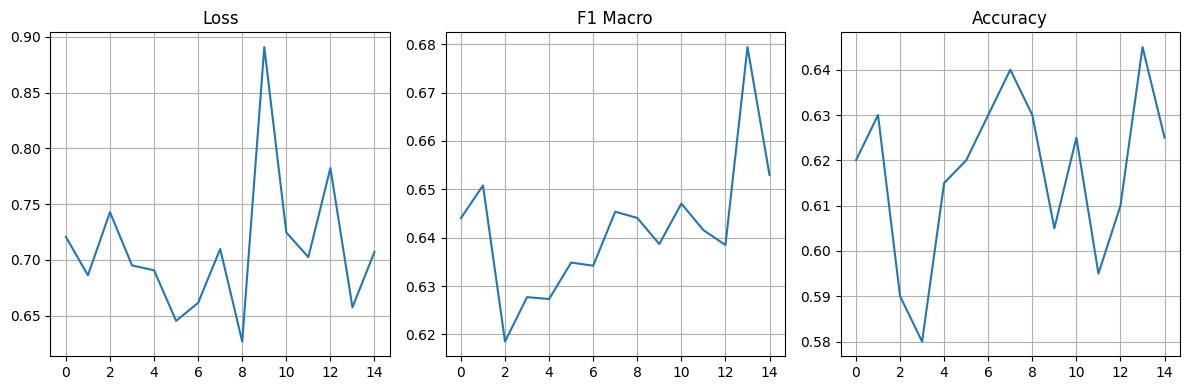

In [110]:
# # ============================================================================
# # MINIMAL VERSION: TRAIN ON OFFSITE TEST DATASET
# # ============================================================================
#  # Options: 'vit_base_patch16_224', 'resnet50', 'densenet121',
# # Configuration
# PRETRAINED_MODEL = "/kaggle/working/task_4_3_experiment_results__final/densenet121_finetuned_v6_best.pth"  # or None
# MODEL_BACKBONE = 'densenet121'
# NUM_EPOCHS = 15
# LEARNING_RATE = 1e-5
# OUTPUT_MODEL = f"/kaggle/working/{MODEL_BACKBONE}_offsite_trained.pth"

# # Prepare data
# offsite_dataset = RetinaMultiLabelDataset(
#     "/kaggle/working/final_project_resources/offsite_test.csv",
#     "/kaggle/working/final_project_resources/images/offsite_test",
#     transform=train_transform
# )
# train_loader = DataLoader(offsite_dataset, batch_size=32, shuffle=True, num_workers=0)

# print(f"Training on {len(offsite_dataset)} offsite images for {NUM_EPOCHS} epochs")

# # Create/load model
# model = create_model(MODEL_BACKBONE, 3, 0.3, True, device, torch.cuda.device_count() > 1)

# if PRETRAINED_MODEL:
#     checkpoint = torch.load(PRETRAINED_MODEL, weights_only=False)
#     if isinstance(model, nn.DataParallel):
#         model.module.load_state_dict(checkpoint['model_state_dict'])
#     else:
#         model.load_state_dict(checkpoint['model_state_dict'])
#     print("✅ Loaded pretrained weights")

# # Setup training
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
# # Calculate class weights directly on device
# offsite_df = pd.read_csv("/kaggle/working/final_project_resources/offsite_test.csv")
# total = len(offsite_df)
# class_counts = torch.tensor([
#     offsite_df['D'].sum(),
#     offsite_df['G'].sum(), 
#     offsite_df['A'].sum()
# ], dtype=torch.float32)

# # Create class weights on device
# class_weights_new = (total - class_counts) / class_counts
# class_weights_new = class_weights_new.to(device)

# criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_new)
# # Training loop
# best_f1 = 0.0
# history = {'loss': [], 'f1': [], 'acc': []}

# for epoch in range(NUM_EPOCHS):
#     model.train()
#     epoch_loss, all_preds, all_labels = 0.0, [], []
    
#     for images, labels, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
#         images, labels = images.to(device), labels.to(device)
        
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         epoch_loss += loss.item()
#         all_preds.append((torch.sigmoid(outputs) > 0.5).float().cpu().numpy())
#         all_labels.append(labels.cpu().numpy())
    
#     # Metrics
#     all_preds = np.vstack(all_preds)
#     all_labels = np.vstack(all_labels)
#     avg_loss = epoch_loss / len(train_loader)
#     f1 = f1_score(all_labels, all_preds, average='macro')
#     acc = accuracy_score(all_labels, all_preds)
    
#     history['loss'].append(avg_loss)
#     history['f1'].append(f1)
#     history['acc'].append(acc)
    
#     print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, F1={f1:.4f}, Acc={acc:.4f}")
    
#     # Save best
#     if f1 > best_f1:
#         best_f1 = f1
#         state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
#         torch.save({'model_state_dict': state_dict, 'best_f1': best_f1}, OUTPUT_MODEL)
#         print(f"  🏆 New best! Saved to {OUTPUT_MODEL}")
    
#     torch.cuda.empty_cache()

# print(f"\n✅ Training complete! Best F1: {best_f1:.4f}")
# print(f"✅ Model saved: {OUTPUT_MODEL}")

# # Plot
# plt.figure(figsize=(12, 4))
# plt.subplot(131); plt.plot(history['loss']); plt.title('Loss'); plt.grid()
# plt.subplot(132); plt.plot(history['f1']); plt.title('F1 Macro'); plt.grid()
# plt.subplot(133); plt.plot(history['acc']); plt.title('Accuracy'); plt.grid()
# plt.tight_layout()
# plt.savefig(f'/kaggle/working/{MODEL_BACKBONE}_offsite_history.png')
# plt.show()

In [1]:
# # ============================================================================
# # QUICK SCRIPT: LOAD .PTH MODEL AND GENERATE CSV PREDICTIONS
# # Copy-paste this into a Jupyter notebook cell
# # ============================================================================

# # ============================================================================
# # STEP 1: CONFIGURE THESE SETTINGS
# # ============================================================================

# # Path to your saved model
# MODEL_PATH = "/kaggle/working/downloaded_file.pth"

# # Model configuration (must match the model you saved)
# MODEL_BACKBONE = 'resnet18'  # Options: 'vit_base_patch16_224', 'resnet50', 'densenet121', 'efficientnet_b0'
# MODEL_DROPOUT = 0.4
# MODEL_USE_SE = True

# # Output path
# OUTPUT_CSV = f"/kaggle/working/{MODEL_BACKBONE}.csv"

# # ============================================================================
# # STEP 2: PREPARE ONSITE TEST DATA
# # ============================================================================

# print("Preparing onsite test dataset...")

# # Get test image files
# onsite_test_dir = "/kaggle/working/final_project_resources/images/onsite_test"
# onsite_files = sorted([f for f in os.listdir(onsite_test_dir) if f.endswith(('.jpg', '.png'))])

# print(f"Found {len(onsite_files)} test images")

# # Create temp CSV
# temp_df = pd.DataFrame({
#     'id': onsite_files,
#     'D': [0] * len(onsite_files),
#     'G': [0] * len(onsite_files),
#     'A': [0] * len(onsite_files)
# })
# temp_csv = 'temp_onsite.csv'
# temp_df.to_csv(temp_csv, index=False)

# # Create dataset
# test_dataset = RetinaMultiLabelDataset(temp_csv, onsite_test_dir, transform=val_transform)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# print(f"✅ Dataset ready: {len(test_dataset)} images")

# # ============================================================================
# # STEP 3: LOAD MODEL
# # ============================================================================

# print(f"\nLoading model from: {MODEL_PATH}")

# # Create model architecture
# model = create_model(
#     backbone_name=MODEL_BACKBONE,
#     num_classes=3,
#     dropout=MODEL_DROPOUT,
#     use_se=MODEL_USE_SE,
#     device=device,
#     multi_gpu=torch.cuda.device_count() > 1
# )

# # Load weights
# checkpoint = torch.load(MODEL_PATH, weights_only=False, map_location=device)

# if isinstance(model, nn.DataParallel):
#     model.module.load_state_dict(checkpoint['model_state_dict'])
# else:
#     model.load_state_dict(checkpoint['model_state_dict'])

# print("✅ Model loaded successfully")

# # ============================================================================
# # STEP 4: GENERATE PREDICTIONS
# # ============================================================================

# print("\nGenerating predictions...")

# model.eval()
# all_filenames = []
# all_predictions = []

# with torch.no_grad():
#     for images, _, filenames in tqdm(test_loader, desc="Predicting"):
#         images = images.to(device)
#         outputs = model(images)
#         predictions = (torch.sigmoid(outputs) > 0.5).float()
        
#         all_filenames.extend(filenames)
#         all_predictions.append(predictions.cpu().numpy())

# all_predictions = np.vstack(all_predictions)

# print(f"✅ Generated {len(all_predictions)} predictions")

# # ============================================================================
# # STEP 5: SAVE TO CSV
# # ============================================================================

# print("\nSaving submission...")

# submission_df = pd.DataFrame({
#     'id': all_filenames,
#     'D': all_predictions[:, 0].astype(int),
#     'G': all_predictions[:, 1].astype(int),
#     'A': all_predictions[:, 2].astype(int)
# })

# submission_df.to_csv(OUTPUT_CSV, index=False)

# print(f"✅ Submission saved to: {OUTPUT_CSV}")
# print(f"\n📋 First 5 predictions:")
# print(submission_df.head())

# print(f"\n📊 Prediction distribution:")
# print(f"  D (DR): {submission_df['D'].sum()} positive ({submission_df['D'].mean()*100:.1f}%)")
# print(f"  G (Glaucoma): {submission_df['G'].sum()} positive ({submission_df['G'].mean()*100:.1f}%)")
# print(f"  A (AMD): {submission_df['A'].sum()} positive ({submission_df['A'].mean()*100:.1f}%)")

# # Cleanup
# os.remove(temp_csv)

# print("\n✅ DONE!")

# # ============================================================================
# # BONUS: BATCH PROCESS MULTIPLE MODELS
# # ============================================================================



In [ ]:
# # ============================================================================
# # CREATE ENSEMBLE AND GENERATE FINAL PREDICTIONS
# # ============================================================================

# print("\n" + "="*80)
# print("CREATING ENSEMBLE OF BEST 3 MODELS")
# print("="*80)

# if len(all_results) >= 3:
#     # Select best 3 models based on validation F1 Macro
#     summary_df = pd.DataFrame(all_results)
#     summary_df = summary_df.sort_values('best_val_f1_macro', ascending=False)
#     best_3_models = summary_df.head(3)
    
#     print("\n🏆 Best 3 models selected for ensemble:")
#     for idx, row in best_3_models.iterrows():
#         print(f"   {row['name']}: Val F1 Macro = {row['best_val_f1_macro']:.4f}")
    
#     # Load the best 3 models
#     ensemble_models = []
#     for idx, row in best_3_models.iterrows():
#         print(f"\nLoading {row['name']}...")
#         checkpoint = torch.load(row['model_path'], map_location=device, weights_only=False)
        
#         # Extract backbone name from model name
#         backbone_map = {
#             'resnet50': 'resnet50',
#             'densenet121': 'densenet121',
#             'inception_v3': 'inception_v3',
#             'shufflenet_v2': 'shufflenet_v2',
#             'vit_base': 'vit_base_patch16_224'
#         }
        
#         backbone_name = None
#         for key in backbone_map:
#             if key in row['name']:
#                 backbone_name = backbone_map[key]
#                 break
        
#         if backbone_name is None:
#             print(f"⚠️ Could not determine backbone for {row['name']}, skipping...")
#             continue
        
#         model = create_model(backbone_name, num_classes=3, dropout=0.5)
#         model.load_state_dict(checkpoint['model_state_dict'])
#         model.eval()
#         ensemble_models.append(model)
#         print(f"✅ Loaded {row['name']}")
    
#     if len(ensemble_models) == 3:
#         print(f"\n✅ Successfully loaded {len(ensemble_models)} models for ensemble")
        
#         # Evaluate ensemble on validation set
#         print("\n" + "="*70)
#         print("EVALUATING ENSEMBLE ON VALIDATION SET")
#         print("="*70)
        
#         val_dataset = RetinaMultiLabelDataset(val_csv, val_img_dir, transform=val_transform)
#         val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
        
#         ensemble_metrics = evaluate_ensemble(ensemble_models, val_loader, device)
        
#         print("\n📊 ENSEMBLE VALIDATION RESULTS:")
#         print(f"  F1 Macro: {ensemble_metrics['f1_macro']:.4f}")
#         print(f"  F1 Micro: {ensemble_metrics['f1_micro']:.4f}")
#         print(f"  Mean Accuracy: {ensemble_metrics['mean_accuracy']:.4f}")
#         print(f"  Mean Precision: {ensemble_metrics['mean_precision']:.4f}")
#         print(f"  Mean Recall: {ensemble_metrics['mean_recall']:.4f}")
        
#         disease_names = ['D (DR)', 'G (Glaucoma)', 'A (AMD)']
#         print("\n  Per-class metrics:")
#         for i, disease in enumerate(disease_names):
#             print(f"    {disease}:")
#             print(f"      F1: {ensemble_metrics['per_class_f1'][i]:.4f}")
#             print(f"      Precision: {ensemble_metrics['per_class_precision'][i]:.4f}")
#             print(f"      Recall: {ensemble_metrics['per_class_recall'][i]:.4f}")
        
#         # Generate ensemble predictions for onsite test
#         print("\n" + "="*70)
#         print("GENERATING ENSEMBLE PREDICTIONS FOR ONSITE TEST")
#         print("="*70)
        
#         onsite_test_files = sorted([f for f in os.listdir(onsite_test_img_dir) if f.endswith(('.jpg', '.png'))])
#         onsite_test_data = pd.DataFrame({
#             'id': onsite_test_files,
#             'D': [0] * len(onsite_test_files),
#             'G': [0] * len(onsite_test_files),
#             'A': [0] * len(onsite_test_files)
#         })
#         onsite_test_csv_temp = os.path.join(output_dir, 'temp_onsite_ensemble.csv')
#         onsite_test_data.to_csv(onsite_test_csv_temp, index=False)
#         onsite_test_dataset = RetinaMultiLabelDataset(onsite_test_csv_temp, onsite_test_img_dir, transform=val_transform)
#         onsite_test_loader = DataLoader(onsite_test_dataset, batch_size=32, shuffle=False, num_workers=0)
        
#         onsite_filenames, onsite_predictions, onsite_probs = ensemble_predict(ensemble_models, onsite_test_loader, device)
        
#         # Save ensemble predictions
#         ensemble_submission_path = os.path.join(output_dir, 'ensemble_best3_onsite_submission.csv')
#         ensemble_submission = create_submission(onsite_filenames, onsite_predictions, ensemble_submission_path)
        
#         # Clean up
#         if os.path.exists(onsite_test_csv_temp):
#             os.remove(onsite_test_csv_temp)
        
#         # Save ensemble validation results
#         ensemble_val_results = {
#             'ensemble_models': [row['name'] for _, row in best_3_models.iterrows()],
#             'val_f1_macro': ensemble_metrics['f1_macro'],
#             'val_f1_micro': ensemble_metrics['f1_micro'],
#             'val_accuracy': ensemble_metrics['mean_accuracy'],
#             'val_precision': ensemble_metrics['mean_precision'],
#             'val_recall': ensemble_metrics['mean_recall']
#         }
        
#         ensemble_results_path = os.path.join(output_dir, 'ensemble_validation_results.csv')
#         pd.DataFrame([ensemble_val_results]).to_csv(ensemble_results_path, index=False)
        
#         print("\n✅ ENSEMBLE COMPLETE!")
#         print(f"   Ensemble validation results: {ensemble_results_path}")
#         print(f"   Ensemble onsite submission: {ensemble_submission_path}")
#         print(f"   Ensemble Val F1 Macro: {ensemble_metrics['f1_macro']:.4f}")
        
#     else:
#         print(f"\n⚠️ Could not load all 3 models for ensemble")
# else:
#     print("\n⚠️ Not enough models completed successfully for ensemble (need at least 3)")
